In [28]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_circuit_layout
from qiskit.providers.fake_provider import FakeVigo, FakeAuckland
from tqdm import tqdm
backend = FakeVigo()

Original depth: 7


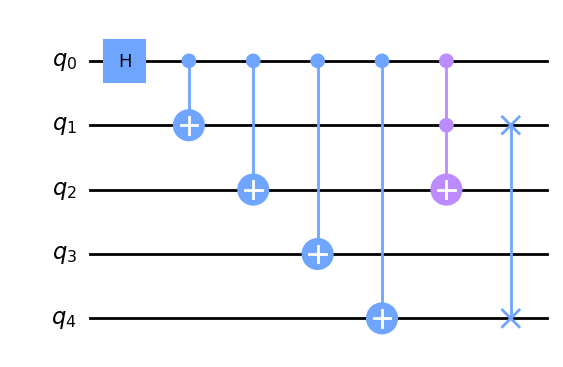

In [3]:
qc = QuantumCircuit(5)
qc.h(0)
qc.cx(0, range(1,5))
qc.ccx(0,1,2)
qc.swap(1,4)
print(f'Original depth: {qc.depth()}')

qc.draw(output='mpl')

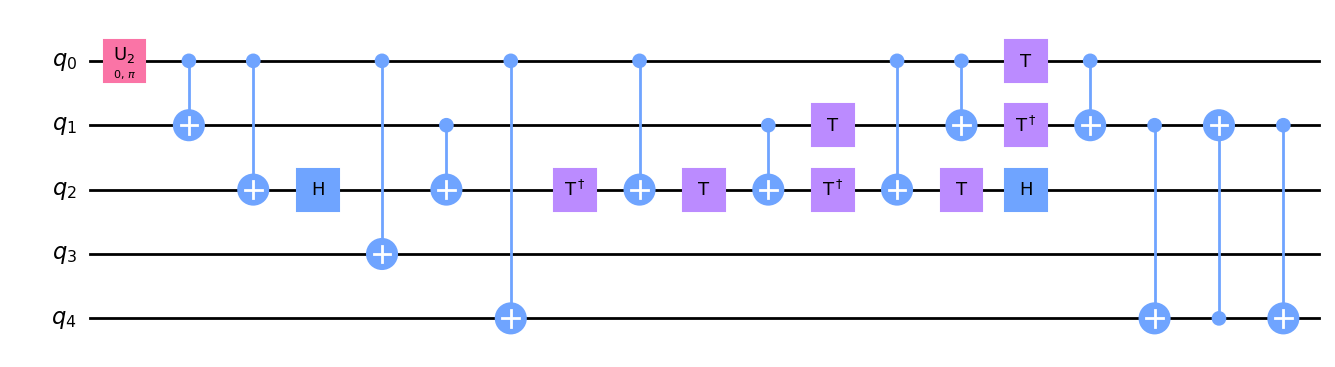

In [4]:
qc = qc.decompose()
qc.draw(output='mpl')

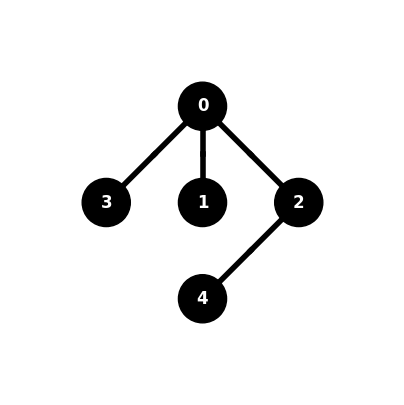

In [13]:
new_qc = transpile(qc, backend=backend, optimization_level=3, scheduling_method='asap')
plot_circuit_layout(new_qc, backend)

Final depth: 35


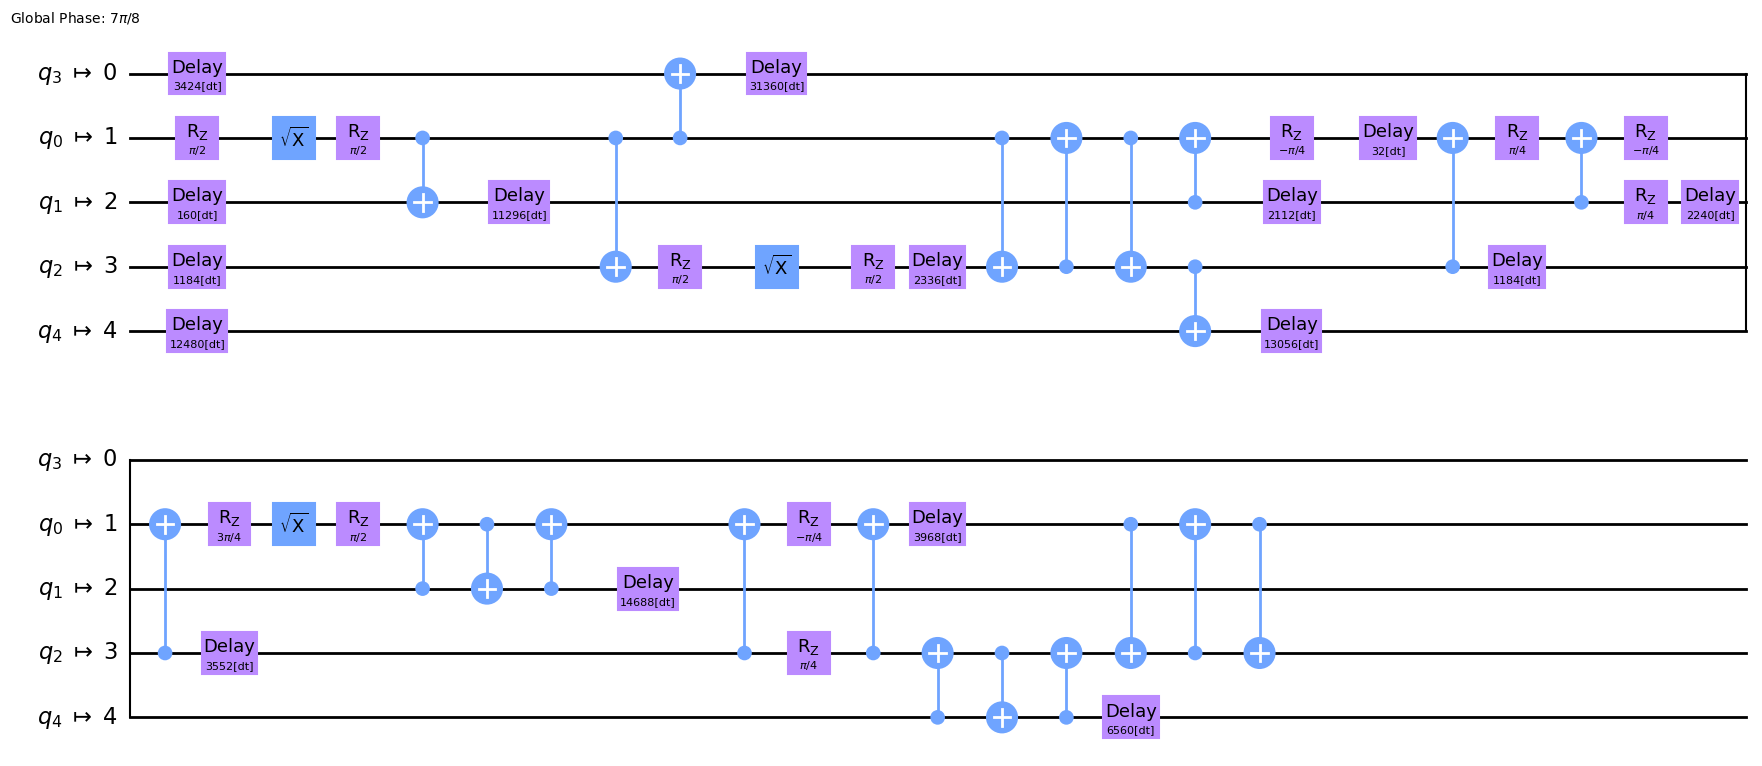

In [14]:
print(f'Final depth: {new_qc.depth()}')
new_qc.draw(output='mpl')

Original depth: 8


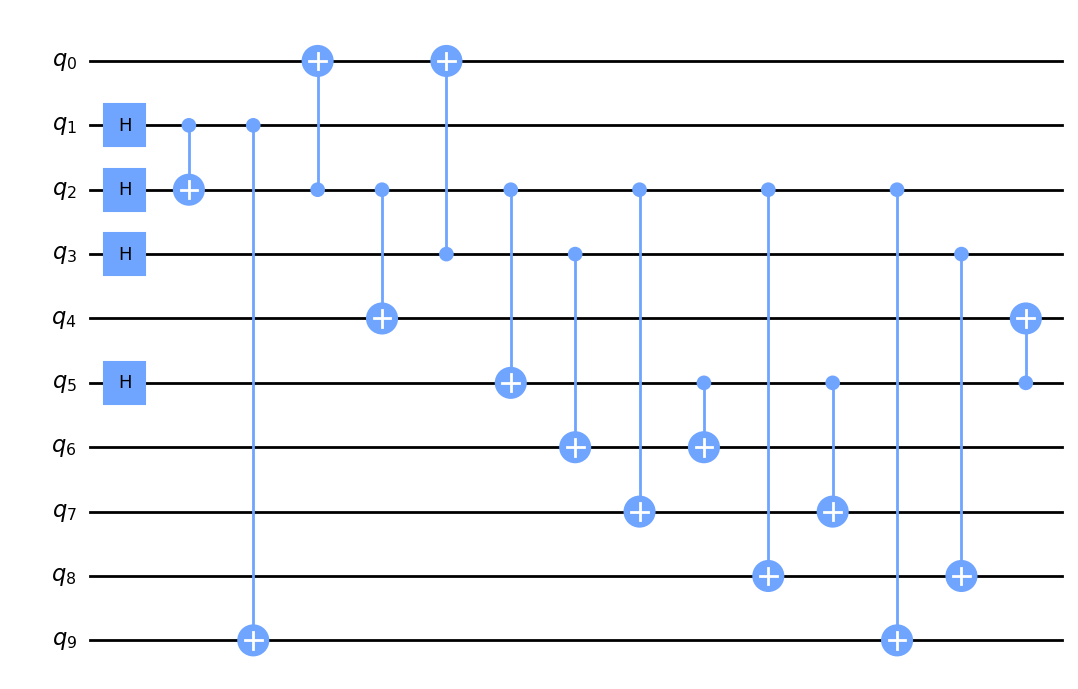

In [19]:
qc10 = QuantumCircuit(10)

qc10.h([1,2,3,5])
qc10.cx(1, [2,9])
qc10.cx(2, [0,4,5,7,8,9])
qc10.cx(3, [0,6,8])
qc10.cx(5, [6,7,4])

print(f'Original depth: {qc10.depth()}')
qc10.draw('mpl')

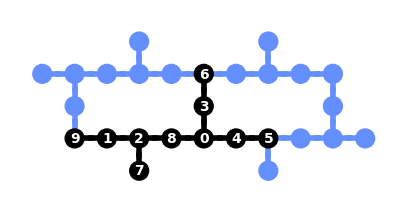

In [26]:
backend1 = FakeAuckland()
new_qc10 = transpile(qc10, backend=backend1, optimization_level=3)#, scheduling_method='asap')
plot_circuit_layout(new_qc10, backend1)

Final depth: 35


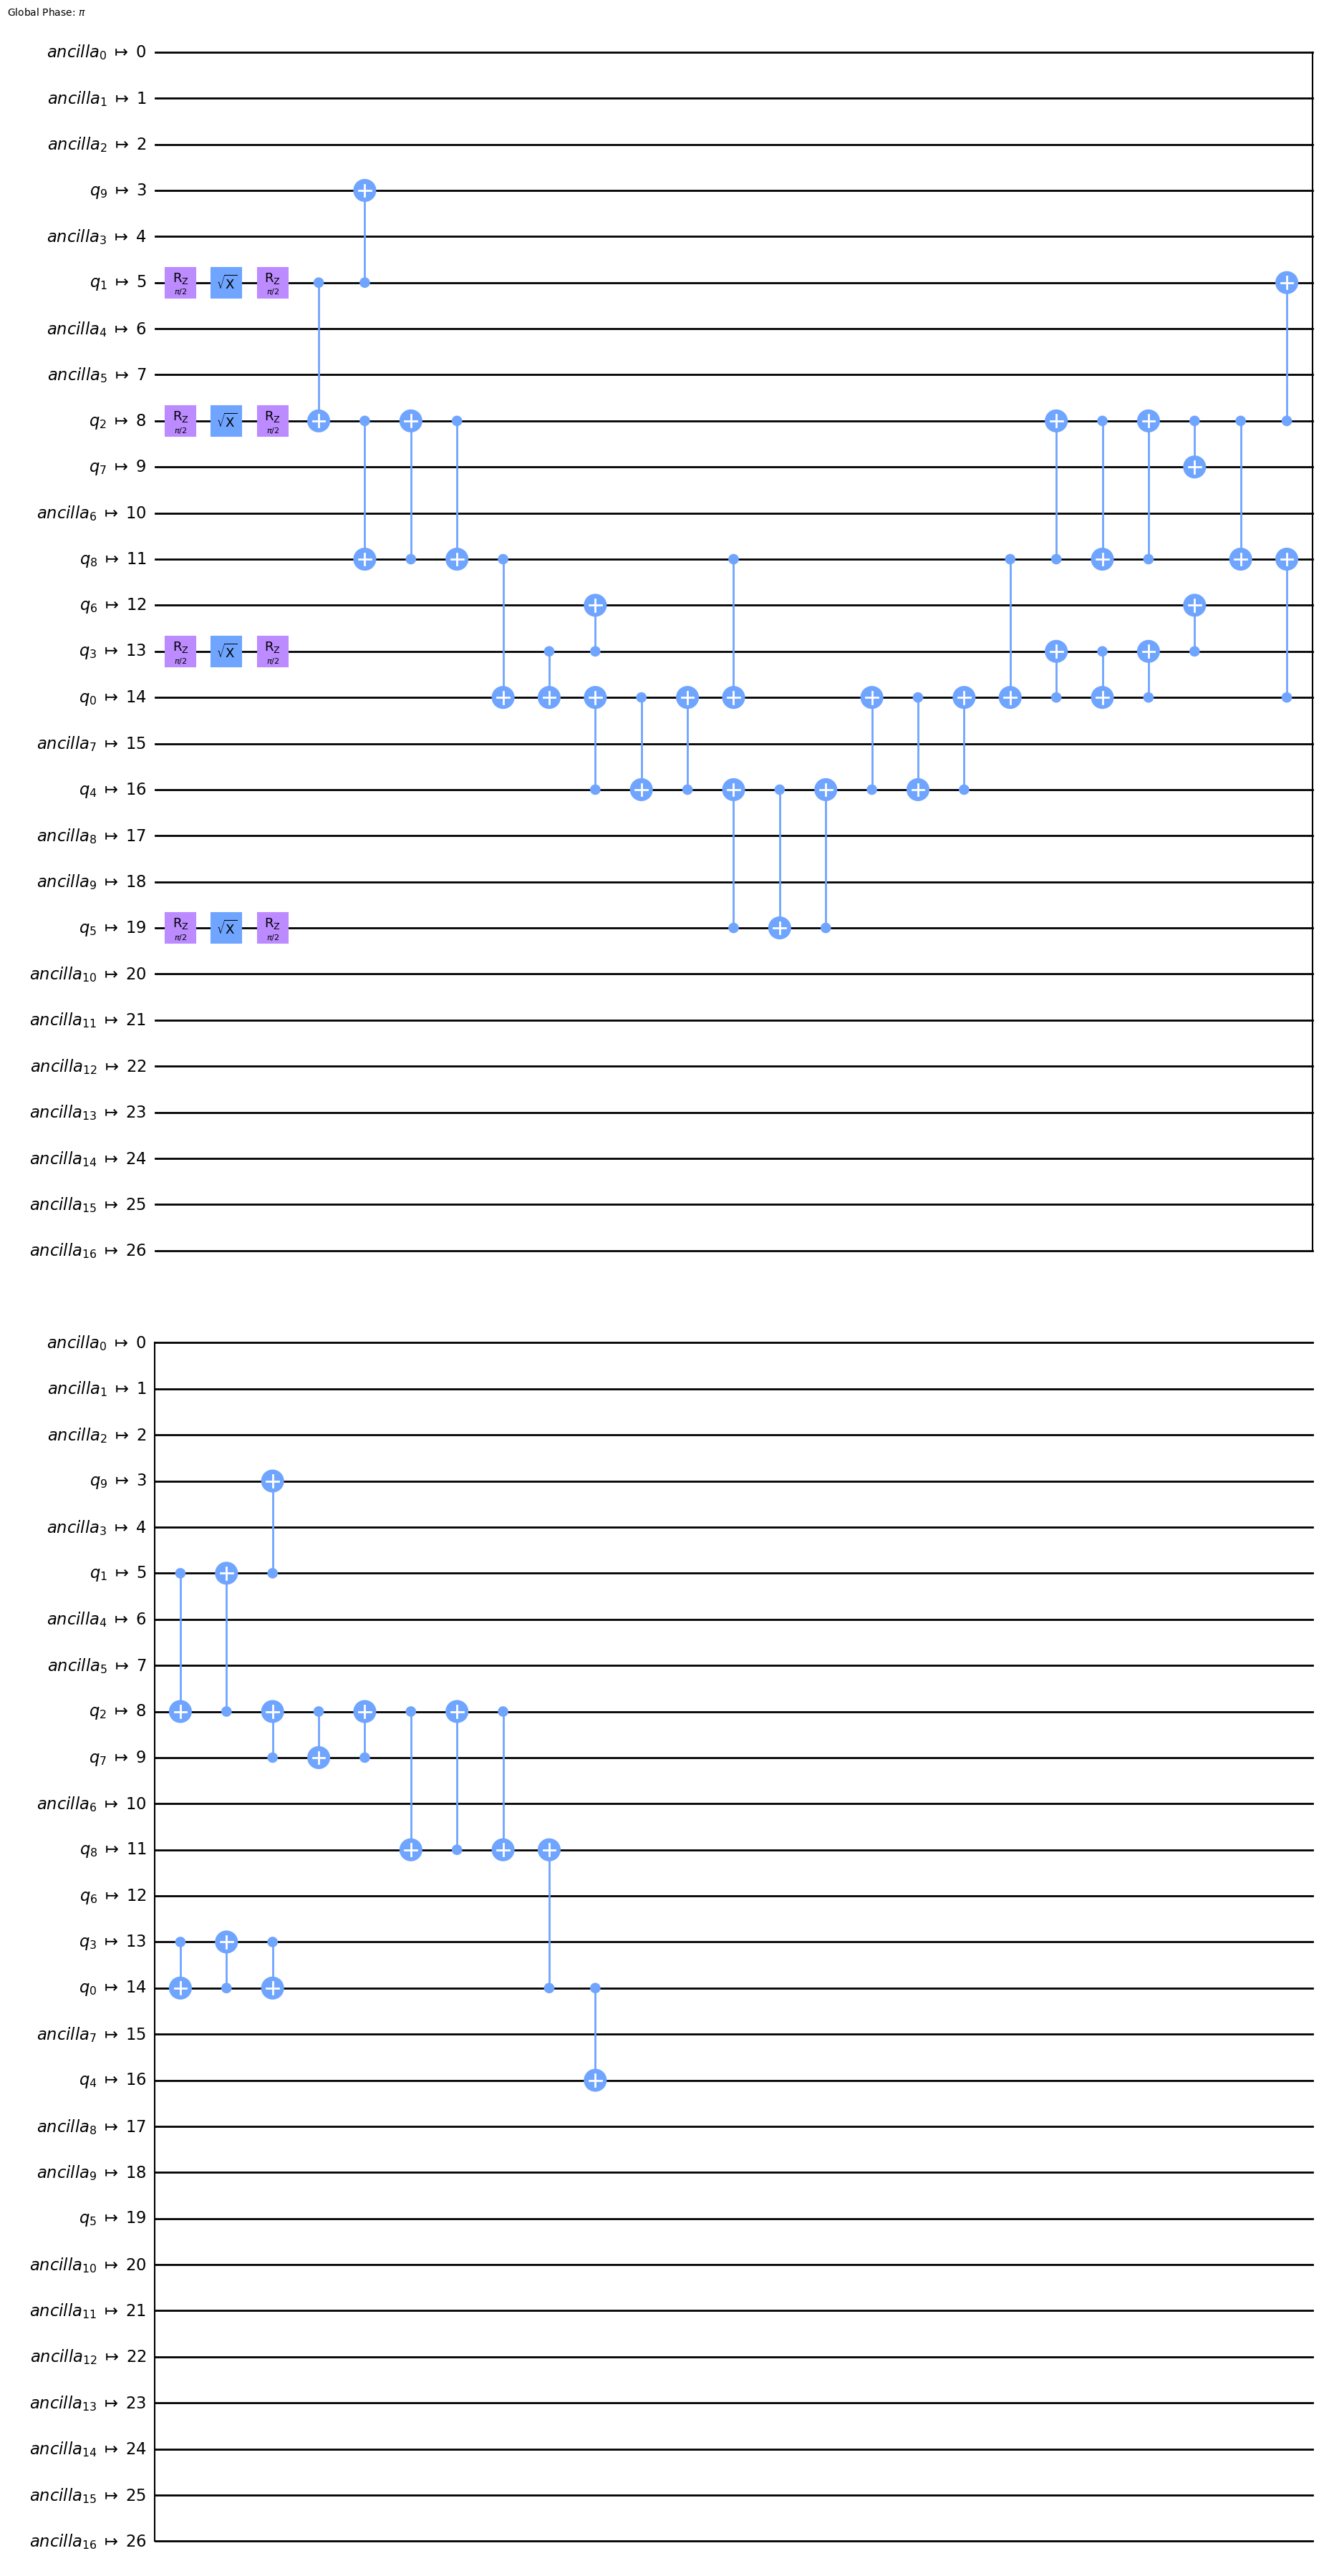

In [27]:
print(f'Final depth: {new_qc10.depth()}')
new_qc10.draw(output='mpl')

In [32]:
# optimization

opt_qc10 = transpile(qc10, backend=backend1, optimization_level=3)
print(opt_qc10.depth())
for _ in tqdm(range(10000)):
    temp = transpile(qc10, backend=backend1, optimization_level=3)
    if temp.depth() < opt_qc10.depth():
        opt_qc10 = temp

print(opt_qc10.depth())

32


100%|██████████| 10000/10000 [26:35<00:00,  6.27it/s]

18


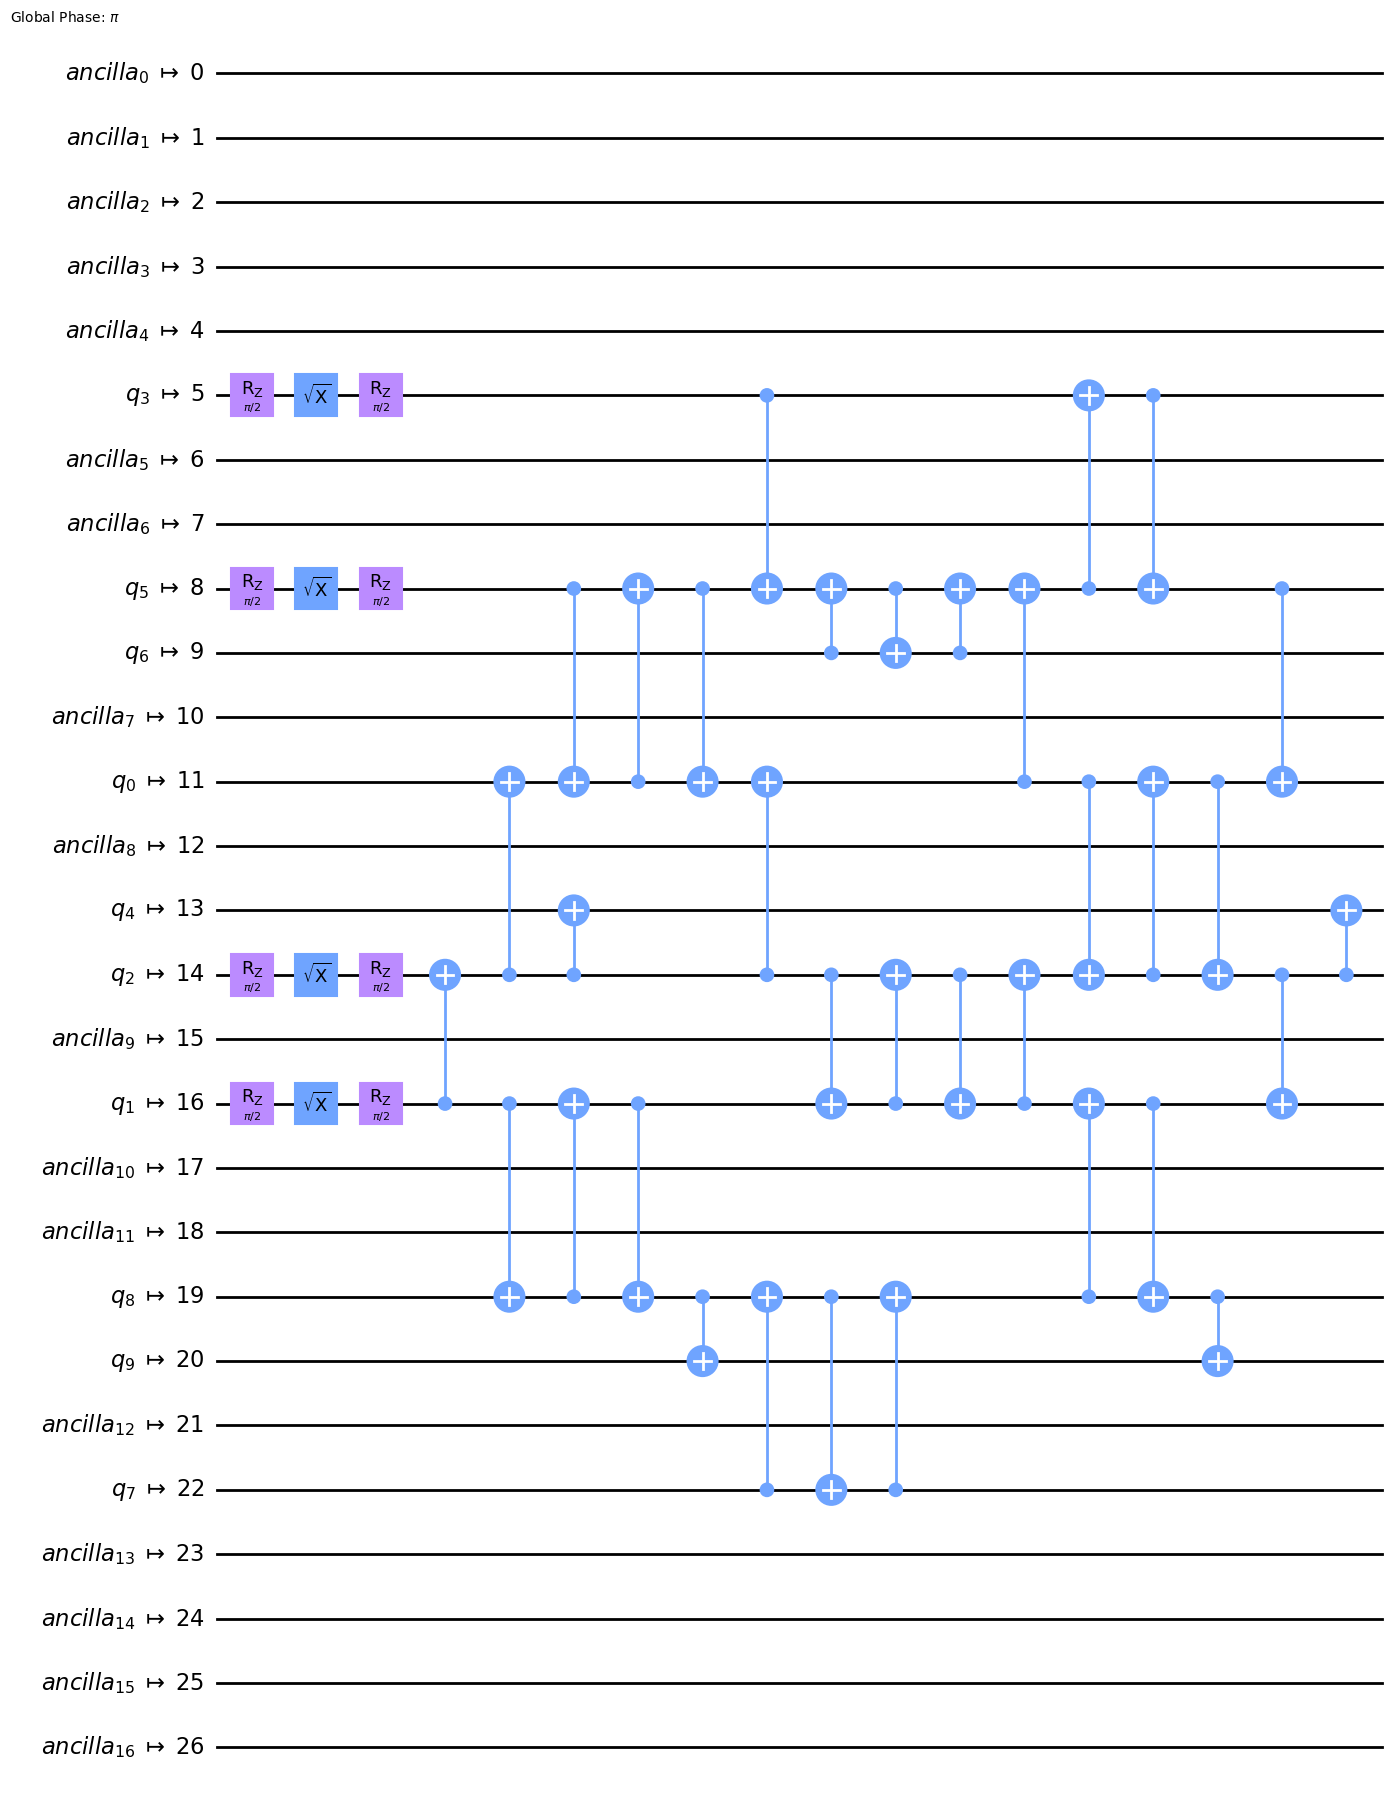

In [33]:
opt_qc10.draw(output='mpl')